In [64]:
import pandas as pd
import numpy as np 
import scipy 
import matplotlib.pyplot as plt
import kaggle

# Hypotheses
- red is more often the winner

# Tasks
## Predict who will win
- Clean data
- Decide which features to use
- Test/Train split data
- Test mutiple models on data

## Try predictive modeling on subsets of the data
- Split the data by when features start being recorded

## Geo plot of hometowns
- Will probably need to encode all the hometowns because right now they're all strings
- Will need to learn how to make a geo plot, what library will be best for this?



In [65]:
#!kaggle datasets download -d calmdownkarm/ufcdataset

In [66]:
df = pd.read_csv('data.csv')

In [67]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [68]:
df.BPrev.mean()

2.391285591026747

In [69]:
sum = df.BPrev.sum()
N = len(df.BPrev)
# Outputs mean
sum/N

2.391285591026747

In [ ]:
df.isna().sum()


In [71]:
groupby_winner = df.groupby('winner')
groupby_winner.count()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,B__Round1_Strikes_Clinch Body Strikes_Landed,B__Round1_Strikes_Clinch Head Strikes_Attempts,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Attempts,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Significant Kicks_Attempts,B__Round1_Strikes_Clinch Significant Kicks_Landed,B__Round1_Strikes_Clinch Significant Punches_Attempts,B__Round1_Strikes_Clinch Significant Punches_Landed,B__Round1_Strikes_Clinch Significant Strikes_Attempts,B__Round1_Strikes_Clinch Significant Strikes_Landed,B__Round1_Strikes_Clinch Total Strikes_Attempts,B__Round1_Strikes_Clinch Total Strikes_Landed,B__Round1_Strikes_Distance Body Kicks_Attempts,B__Round1_Strikes_Distance Body Kicks_Landed,B__Round1_Strikes_Distance Body Punches_Attempts,B__Round1_Strikes_Distance Body Punches_Landed,B__Round1_Strikes_Distance Body Strikes_Attempts,B__Round1_Strikes_Distance Body Strikes_Landed,B__Round1_Strikes_Distance Head Kicks_Attempts,B__Round1_Strikes_Distance Head Kicks_Landed,B__Round1_Strikes_Distance Head Punches_Attempts,B__Round1_Strikes_Distance Head Punches_Landed,B__Round1_Strikes_Distance Head Strikes_Attempts,B__Round1_Strikes_Distance Head Strikes_Landed,B__Round1_Strikes_Distance Leg Kicks_Attempts,B__Round1_Strikes_Distance Leg Kicks_Landed,B__Round1_Strikes_Distance Leg Strikes_Attempts,B__Round1_Strikes_Distance Leg Strikes_Landed,B__Round1_Strikes_Distance Strikes_Attempts,B__Round1_Strikes_Distance Strikes_Landed,B__Round1_Strikes_Ground Body Strikes_Attempts,B__Round1_Strikes_Ground Body Strikes_Landed,B__Round1_Strikes_Ground Head Strikes_Attempts,B__Round1_Strikes_Ground Head Strikes_Landed,B__Round1_Strikes_Ground Leg Strikes_Attempts,B__Round1_Strikes_Ground Leg Strikes_Landed,B__Round1_Strikes_Ground Significant Kicks_Attempts,B__Round1_Strikes_Ground Significant Kicks_Landed,B__Round1_Strikes_Ground Significant Punches_Attempts,B__Round1_Strikes_Ground Significant Punches_Landed,B__Round1_Strikes_Ground Significant Strikes_Attempts,B__Round1_Strikes_Ground Significant Strikes_Landed,B__Round1_Strikes_Ground Total Strikes_Attempts,B__Round1_Strikes_Ground Total Strikes_Landed,B__Round1_Strikes_Head Significant Strikes_Attempts,B__Round1_Strikes_Head Significant Strikes_Landed,B__Round1_Strikes_Head Total Strikes_Attempts,B__Round1_Strikes_Head Total Strikes_Landed,B__Round1_Strikes_Kicks_Attempts,B__Round1_Strikes_Kicks_Landed,B__Round1_Strikes_Knock Down_Landed,B__Round1_Strikes_Leg Total Strikes_Attempts,B__Round1_Strikes_Leg Total Strikes_Landed,B__Round1_Strikes_Legs Significant Strikes_Attempts,B__Round1_Strikes_Legs Significant Strikes_Landed,B__Round1_Strikes_Legs Total Strikes_Attempts,B__Round1_Strikes_Legs Total Strikes_Landed,B__Round1_Strikes_Punches_Attempts,B__Round1_Strikes_Punches_Landed,B__Round1_Strikes_Significant Strikes_Attempts,B__Round1_Strikes_Significant Strikes_Landed,B__Round1_Strikes_Total Strikes_Attempts,B__Round1_Strikes_Total Strikes_Landed,B__Round1_TIP_Back Control Time,B__Round1_TIP_Clinch Time,B__Round1_TIP_Control Time,B__Round1_TIP_Distance Time,B__Round1_TIP_Ground Control Time,B__Round1_TIP_Ground Time,B__Round1_TIP_Guard Control Time,B__Round1_TIP_Half Guard Control Time,B__Round1_TIP_Misc. Ground Control Time,B__Round1_TIP_Mount Control Time,B__Round1_TIP_Neutral Time,B__Round1_TIP_Side Control Time,B__Round1_TIP_Standing Time,B__Round2_Grappling_Reversals_Landed,B__Round2_Grappling_Standups_Landed,B__Round2_Grappling_Submissions_Attempts,B__Round2_Gra

In [72]:
# groupby_winner.get_group('red')

In [73]:
Number_of_fighters = len(df.B_ID.unique()) + len(df.R_ID.unique())
Number_of_fighters

1777

In [ ]:
df.loc[2292:]

In [ ]:
# df.isna().sum()

In [ ]:
# df[['B_Name','B_ID', 'BPrev','R_Name', 'R_ID', 'RPrev', 'Date', 'Event_ID', 'winner']]

In [77]:
b_weight = df.B_Weight.fillna(method='ffill')
sorted_b_weight = sorted(b_weight)
# sorted_b_weight = np.array(sorted_b_weight)
b_weight.dtype

dtype('float64')

In [78]:
r_weight = df.R_Weight.fillna(method='ffill')
sorted_r_weight = sorted(r_weight)
r_weight.dtype

dtype('float64')

### Box plots of weights of blue contenders and red contenders 

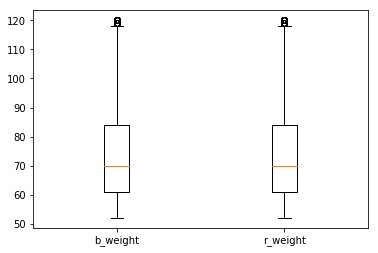

In [79]:
plt.boxplot([sorted_b_weight, sorted_r_weight], labels=['b_weight', 'r_weight']);

### Bar chart of count of fighters in each weight class

In [80]:
fighters = df[['B_Name', 'B_ID', 'B_Weight', 'R_Name', 'R_ID', 'R_Weight']]
# fighters.B_Weight, fighters.R_Weight = fighters.B_Weight * 2.2, fighters.R_Weight * 2.2

In [81]:
fighters.head()

,B_Name,B_ID,B_Weight,R_Name,R_ID,R_Weight
0,Alistair Overeem,808,120.0,Frank Mir,377,119.0
1,Ricardo Lamas,1054,65.0,Jose Aldo,1052,65.0
2,Urijah Faber,959,61.0,Renan Barao,1527,61.0
3,Danny Martinez,1056,56.0,Chris Cariaso,1253,56.0
4,Tom Watson,2005,84.0,Nick Catone,464,84.0


In [83]:
ranges = [-np.inf, 125.0, 135.0, 145.0, 155.0, 170.0, 185.0, 205.0, np.inf]
labels = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']
weight_classes = fighters.weight_class = pd.cut(fighters.B_Weight, ranges, labels=labels)
len(weight_classes)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


2318

## Creating weight class column
### There are more weight classes than previously thought and some fighters are fighting at different weight classes it seems

In [84]:
fighters['weight_class'] = pd.Series(weight_classes)
fighters.tail(50)

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,B_Name,B_ID,B_Weight,R_Name,R_ID,R_Weight,weight_class
2268,Eryk Anders,2954,93.0,Thiago Santos,2087,93.0,Flyweight
2269,Ryan Spann,2935,93.0,Luis Henrique,2658,93.0,Flyweight
2270,Christos Giagos,2322,70.0,Charles Oliveira,1531,70.0,Flyweight
2271,Chase Sherman,2787,113.0,Augusto Sakai,2554,120.0,Flyweight
2272,Gillian Robertson,3031,56.0,Mayra Bueno Silva,3176,61.0,Flyweight
2273,Marina Rodriguez,3168,52.0,Randa Markos,2350,52.0,Flyweight
2274,James Vick,1984,70.0,Justin Gaethje,2896,70.0,Flyweight
2275,Markus Perez,3023,84.0,Andrew Sanchez,2789,84.0,Flyweight
2276,Tim Williams,2943,84.0,Eryk Anders,2954,93.0,Flyweight
2277,Jon Tuck,2019,70.0,Drew Dober,1340,70.0,Flyweight
